- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

import logging
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

import pandas as pd
# to compute time of pipeline
from time import time, strftime, gmtime

from common_graphs import *

import os
import tensorflow as tf
import tensorflow_hub as hub

from bag_of_words import *
from Word2Vec import *
from BERT import *
from transformers import TFAutoModel
from USE import *

%matplotlib inline
%autosave 300

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


Autosaving every 300 seconds


In [2]:
os.environ["TF_KERAS"]='1'

print(tf.__version__)
#print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.1
Num GPUs Available:  0
True


In [3]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "final_data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"

## Transformations

In [4]:
data = pd.read_csv(input_file)

In [5]:
data.head()

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_,text_bag-of-words,text_bag-of-words_lem,text_deeplearning,length_bag-of-words,length_deeplearning
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,156,248
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,63,84
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,158,252
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,114,148
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,156,228


In [6]:
l_cat = list(set(data['category']))
print(l_cat)

print("catégories : ", l_cat)
y_cat_num = data["target"]
y_cat_num

['Home Furnishing ', 'Home Decor & Festive Needs ', 'Beauty and Personal Care ', 'Baby Care ', 'Computers ', 'Kitchen & Dining ', 'Watches ']
catégories :  ['Home Furnishing ', 'Home Decor & Festive Needs ', 'Beauty and Personal Care ', 'Baby Care ', 'Computers ', 'Kitchen & Dining ', 'Watches ']


0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: target, Length: 1050, dtype: int64

#### 1) Bag of Words : Count words + TF-IDF

#### 1) fit / transform description - text

##### 1) Preparing the vectors

In [7]:
feat = ['text'] # 'text' 0.399 et 0.5567 / text_bag-of-words_lem

In [8]:
cv_transform, ctf_transform = create_bag_of_words_vectors(data, feat, feat)

Count Vector
TF-IDF


In [9]:
print(cv_transform.shape)
print(ctf_transform.shape)

(1050, 5843)
(1050, 5843)


##### 2) Executing the models

In [10]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


CountVectorizer : 
-----------------
ARI : 0.399, time : 16.0 seconds.

Tf-idf : 
--------
ARI : 0.5567, time : 15.0 seconds.


##### 3) Visualization

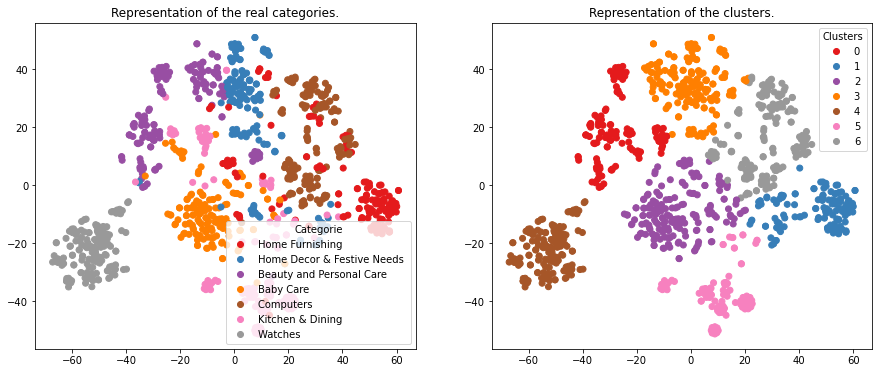

ARI :  0.5567


In [11]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

#### 2) fit / transform product_name + text

##### 1) Preparing the vectors

In [12]:
# création du bag of words (CountVectorizer et Tf-idf)
print("Separate vocabulary")

textual_columns = ['product_name', 'text']

cv_transform, ctf_transform = create_bag_of_words_vectors(data, textual_columns, textual_columns)


Separate vocabulary
Count Vector
TF-IDF


In [13]:
print(cv_transform.shape)
print(ctf_transform.shape)

(1050, 8140)
(1050, 8140)


##### 2) Executing the models

In [14]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


CountVectorizer : 
-----------------
ARI : 0.4025, time : 18.0 seconds.

Tf-idf : 
--------
ARI : 0.5585, time : 15.0 seconds.


##### 3) Visualization

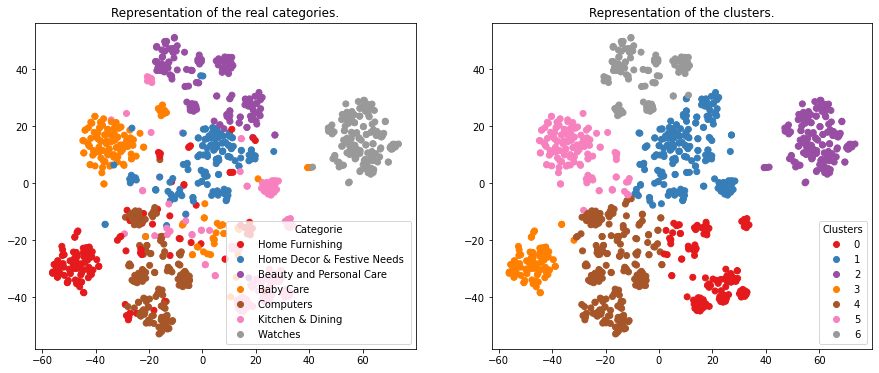

ARI :  0.5585


In [15]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

#### 3) fit product_name / transform text

##### 1) Preparing the vectors

In [16]:
# création du bag of words (CountVectorizer et Tf-idf)

feat_fit = ['product_name']
feat_transform = ['text_bag-of-words_lem'] # text / text_bag-of-words_lem

cv_transform, ctf_transform = create_bag_of_words_vectors(data, feat_fit, feat_transform)

Count Vector
TF-IDF


In [17]:
print(cv_transform.shape)
print(ctf_transform.shape)

(1050, 2297)
(1050, 2297)


##### 2) Executing the models

In [18]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


CountVectorizer : 
-----------------
ARI : 0.3883, time : 19.0 seconds.

Tf-idf : 
--------
ARI : 0.3441, time : 15.0 seconds.


##### 3) Visualization

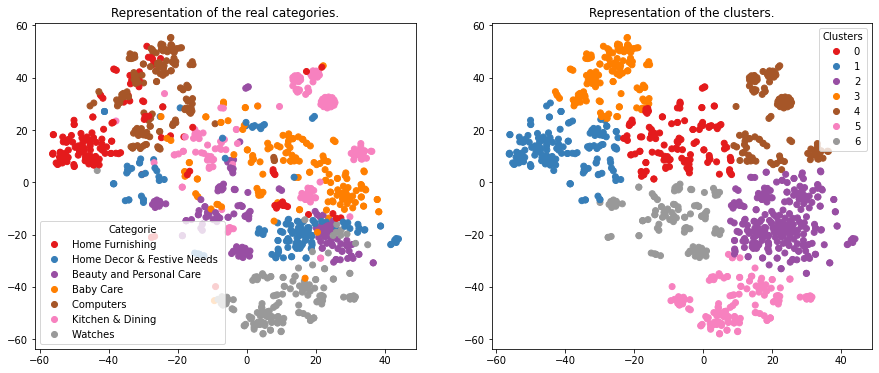

ARI :  0.3441


In [19]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### Conclusion bag of words
We have tried counting the occurrences of each sentence according to the vocabulary and we have also tried tf-idf.
We got the best results while using "product_name".

We got better results with the raw sentences than with the cleaned ones.

The best ARI = 0.56 with fit/transform product_name or fit/transform text.

### II) Words Embeddings : Word2Vec

##### 1) Creating a Word2Vec model

In [20]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data['product_name'].to_list() # text : 0.19 ARI / text_bag-of-words_lem : 0.21
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [21]:
w2v_words, model_vectors = create_w2v_model(sentences, w2v_min_count, w2v_size, w2v_window, w2v_epochs)

Build & train Word2Vec model ...
Vocabulary size: 2038
Word2Vec trained


##### 2) Preparing the sentences (tokenization)

In [22]:
x_sentences, tokenizer = tokenize_sentences(sentences, maxlen)

Fit Tokenizer ...
Number of unique words: 2039


##### 3) Creating the embedding matrix

In [23]:
embedding_matrix, vocab_size = create_embedding_matrix(w2v_words, model_vectors, tokenizer)

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (2039, 300)


##### 4) Creating the embedded model

In [24]:
embed_model = create_embedding_model(x_sentences, maxlen, vocab_size, w2v_size, embedding_matrix)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           611700    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 611,700
Trainable params: 611,700
Non-trainable params: 0
_________________________________________________________________


##### 5) Execution of the model

In [25]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [26]:
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)

ARI : 0.5056, time : 13.0 seconds.


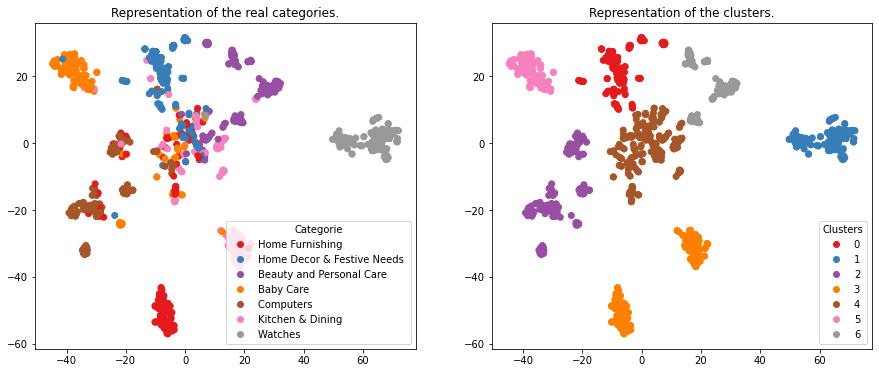

ARI :  0.5056


In [27]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### Conclusion Word2Vec
We get good results with Word2Vec word embedding.

We got better results with the raw sentences than with the cleaned ones.

The best ARI = 0.5 with product_name.

### III) Words Embeddings : BERT

#### 1) BERT HuggingFace
* Using pre-trained model 'bert-base-uncased'

In [28]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['product_name'].to_list() # clean_text 0.29

Creating the features

In [29]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

  0%|          | 0/105 [00:00<?, ?it/s]

1/1 [==============================] - 1s 807ms/step
Computing time :  104.0


In [30]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI : 0.6187, time : 18.0 seconds.


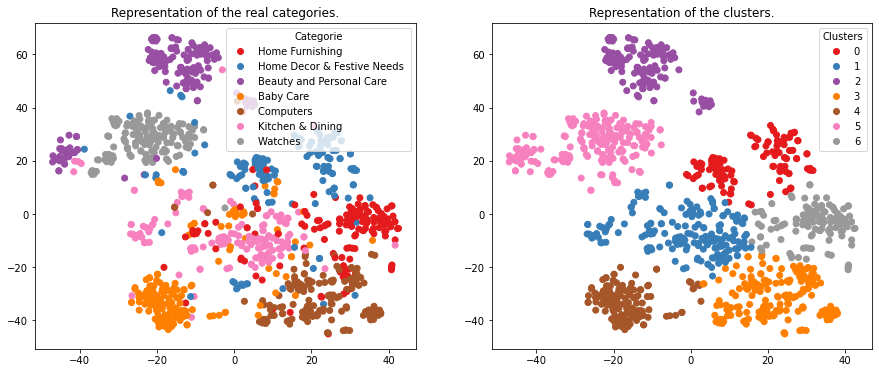

ARI :  0.6187


In [31]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

#### 2) BERT hub Tensorflow
* Using pre-trained model : "bert_en_uncased_L-12_H-768_A-12/4'"

In [32]:
# Guide about Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [33]:
sentences = data['product_name'].to_list() # text

In [34]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='TFhub')

  0%|          | 0/105 [00:00<?, ?it/s]

Computing time :  93.0


In [35]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI : 0.5928, time : 17.0 seconds.


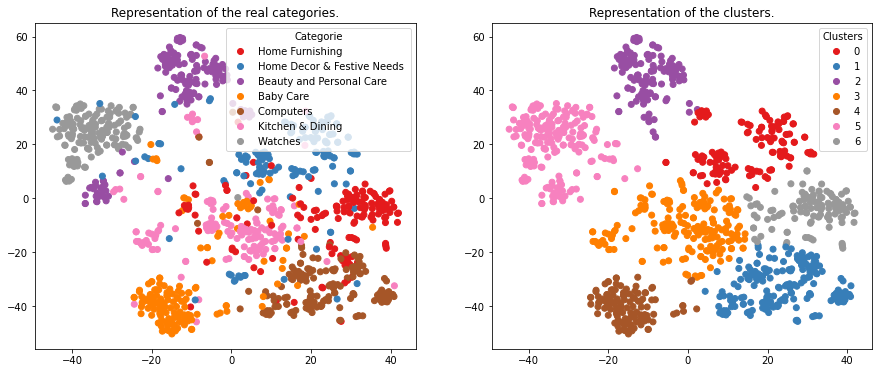

ARI :  0.5928


In [36]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

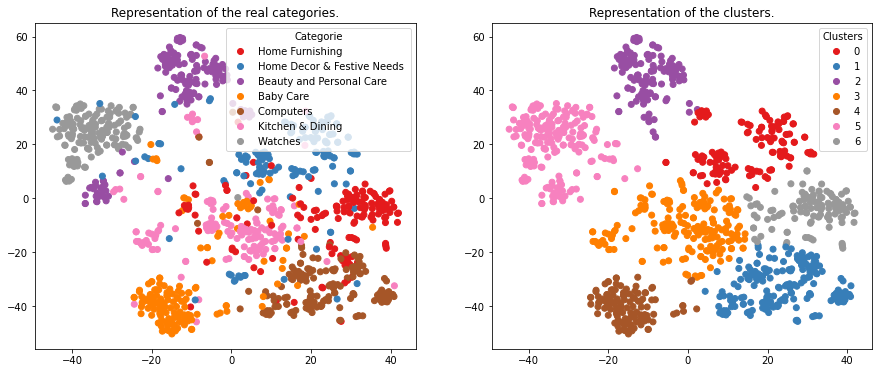

ARI :  0.5928


In [37]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### Conclusion BERT

We get good results with BERT word embedding.

We got better results with the raw sentences than with the cleaned ones.

The best ARI = 0.62 with product_name for the pre-trained model : 'bert-base-uncased' from Hugging Face

### IV) Words Embeddings : USE (Universal Sentence Encoder)

https://tfhub.dev/google/universal-sentence-encoder/4

In [38]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

##### Using product_name

In [39]:
batch_size = 10
sentences = data['product_name'].to_list() # no preprocessing better !! ? to check

In [40]:
features_USE = feature_USE_fct(embed, sentences, batch_size)

temps traitement :  1.0


In [41]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

ARI : 0.7094, time : 15.0 seconds.


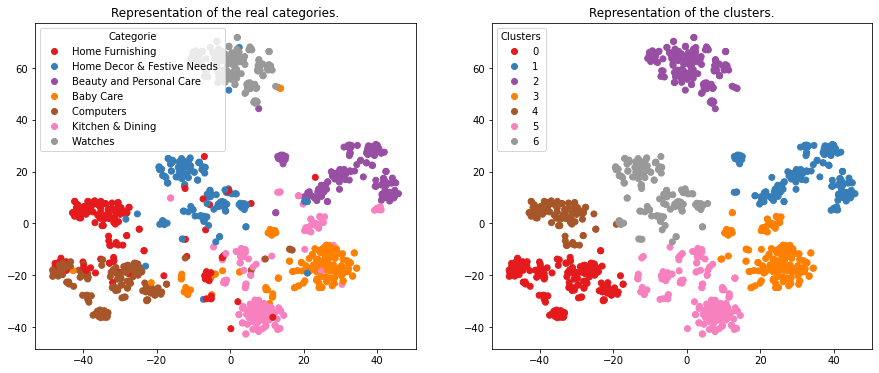

ARI :  0.7094


In [42]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### Using text / clean_text : cleaned or not

In [43]:
batch_size = 10
sentences = data['text_deeplearning'].to_list() # no preprocessing better !! ? to check

In [44]:
features_USE = feature_USE_fct(embed, sentences, batch_size)

temps traitement :  1.0


In [45]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

ARI : 0.4318, time : 14.0 seconds.


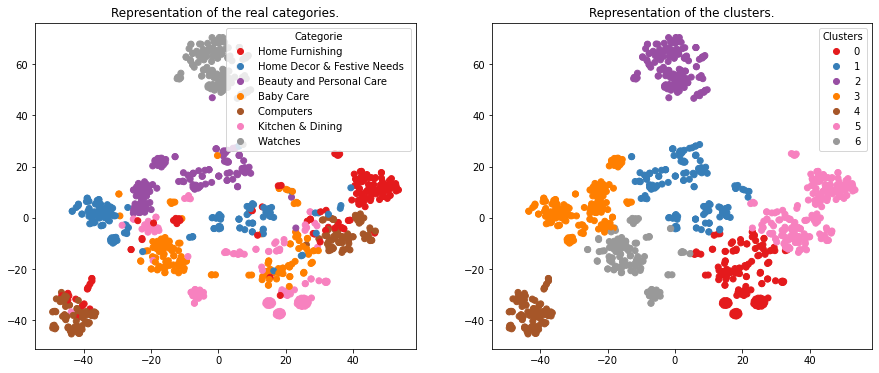

ARI :  0.4318


In [46]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### Conclusion USE
We get good results with USE word embedding.

We got better results with the raw sentences than with the cleaned ones.

The best ARI = 0.71 with product_name.

### Conclusion
* It seems like the classification of products based on NLP might be doable.
* Using KMeans clustering, we categorized the products using bag of words and word embeddings.
* Best ARI : 0.71 for product_name as the corpus and using USE word embedding method.

In [47]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 402.013300 sec
computing time : 00:06:42
